# ECG

#### Coleta: 15/10/2021
#### Tratamento: 16/10/2021
#### Simulador – 120 bpm

## Descrição

#### As medidas foram coletadas a partir do simulador ECG Medsystem Hospitalar. Os dados são coletados pelo sensor AD8232 e transmitidos via Bluetooth para o computador.

In [3]:
# Importando as bibliotecas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Definindo a taxa de amostragem
sample_rate = 191

### Apresentação dos dados

In [17]:
with open('ecg_simulador_15-10_5.txt', newline = '') as db:                                                                                          
    db_reader = pd.read_csv(db, delimiter='\t', names=['Horário', 'Amplitude'])
    
db_reader = db_reader.dropna()
db_reader

,Horário,Amplitude
0,18:23:28.764,92
1,18:23:28.764,398
2,18:23:28.764,393
3,18:23:28.764,398
4,18:23:28.764,392
...,...,...
11647,18:24:29.140,404
11648,18:24:29.150,407
11649,18:24:29.150,400
11650,18:24:29.150,391


In [18]:
db_reader.dtypes

Horário      object
Amplitude     int64
dtype: object

In [19]:
seconds = db_reader['Horário'].map(lambda x: pd.to_timedelta(x).seconds)
seconds

0        66208
1        66208
2        66208
3        66208
4        66208
         ...  
11647    66269
11648    66269
11649    66269
11650    66269
11651    66269
Name: Horário, Length: 11652, dtype: int64

In [20]:
min = seconds.loc[seconds.first_valid_index()]
max = seconds.loc[seconds.last_valid_index()]
delta = max - min
delta

61

In [21]:
data = db_reader['Amplitude']

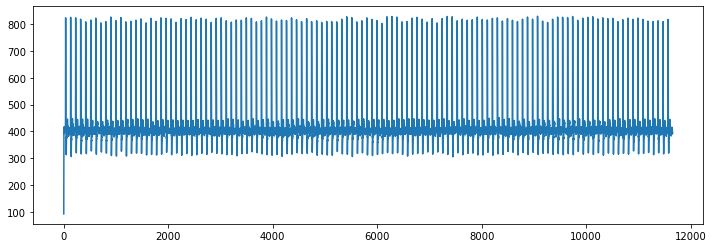

In [22]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

bpm: 119.261122
ibi: 503.097731
sdnn: 4.166381
sdsd: 4.618182
rmssd: 7.215183
pnn20: 0.016807
pnn50: 0.000000
hr_mad: 5.235602
sd1: 5.101905
sd2: 2.995975
s: 48.019813
sd1/sd2: 1.702920
breathingrate: 0.166667


C:\Users\Lucia\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

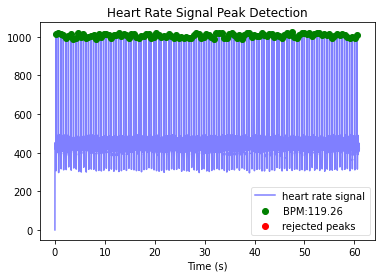

In [23]:
# Análise
wd, m = hp.process(hp.scale_data(data), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

# Mostrar as medidas computadas
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))